In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

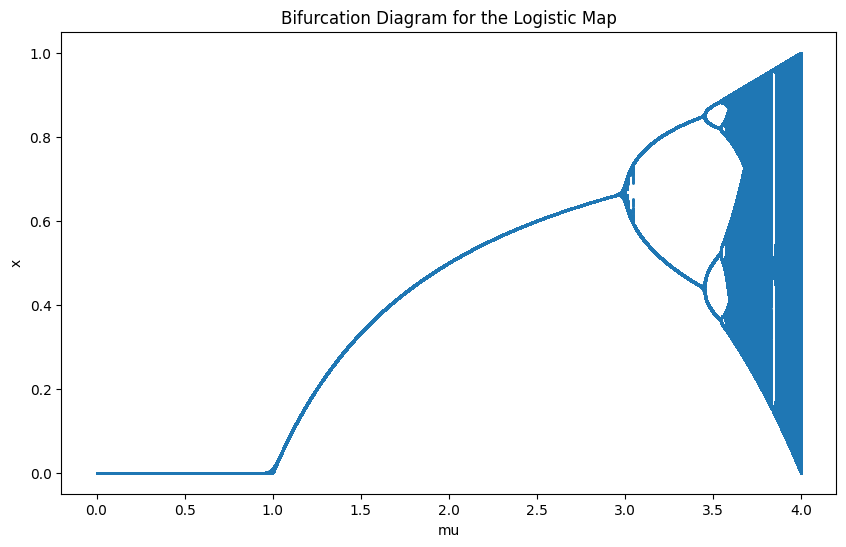

In [ ]:
# Define the logistic map
def log_map(x, mu):
    return mu * x * (1 - x)

# Define number of iterations and number of transient iterations
num_iter = 1000
num_transients = 100

# Range of mu values
u_min = 0
u_max = 4.0
num_u = 10000
u_val = np.linspace(u_min, u_max, num_u)

# Define the arrays to store the bifurcation diagram
x_values = np.zeros((num_iter, num_u))
u_values_bifurcation = np.zeros((num_iter, num_u))

# Iterate over mu values and initial conditions
for i, u in enumerate(u_val):
    x = np.random.random()


    for j in range(num_iter):
        x = log_map(x, u)

        if j > num_transients:
            x_values[j, i] = x

            u_values_bifurcation[j, i] = u



# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(u_values_bifurcation, x_values, s=1)
plt.xlabel('mu')
plt.ylabel('x')
plt.title('Bifurcation Diagram for the Logistic Map')
plt.show()


In [ ]:
def feig():
  crit = 0
  two = 0
  four = 0

  val = {}

  arr = np.linspace(1,4,2500)

  for i in arr:
    val[i] = []

    x = .001

    for j in range(1,1000):
      x = log_map(x, i)

      if(j>= 900):
        val[i].append(round(x,2))

    val[i] = [*set(val[i])]



  for j in val:
    if (len(val[j]))>25:
        crit = j
        print("Critical Point", j)

        break



  for j in val:
    if(len(val[j]) == 2):

      two = j

      print("Period-2", j)

      print(j)

      break



  # Period 4 loop
  for j in val:
    if(len(val[j]) == 4):

      four = j

      print("Period 4", j)

      break

  # Initial values
  X = [0.05]
  x = 0.05

  for j in range(50):
    x = log_map(x, crit)

    X.append(x)

  plt.plot(X)
  plt.title("X vs N")

  print(four, two)
  print("Feigenbaum Number:", (two-1)/(four-two))


Critical Point 3.581032412965186
Period-2 2.9975990396158463
2.9975990396158463
Period 4 3.452581032412965
3.452581032412965 2.9975990396158463
Feigenbaum Number: 4.3905013192612135


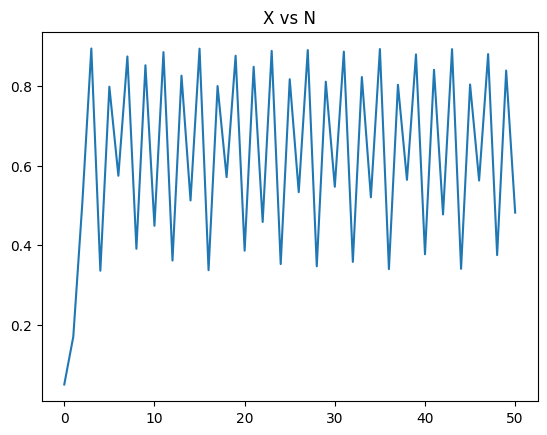

In [ ]:
feig()

In [ ]:
def freq(a):
  num = a[0]

  count = 0

  for i in a:
    frequency = a.count(i)

    if(frequency > count):
      num = i

      count = frequency

  return num

def steps(o):
  X1 = [.05]
  X2 = [.05]
  x1 = 0.05

  for i in range(20):
    X1.append(X1[len(X1)-1])
    x1 = log_map(x1, o)
    X2.append(x1)
    X1.append(x1)
    X2.append(x1)

  plt.plot(X1, X2)

  for j in range(40):
    X2[j] = round(X2[j],2)

  print(freq(X2))

In [ ]:
def logmapplot(mu):
  A = np.linspace(0,1,100)

  B = log_map(A, mu)

  plt.plot(A, A)
  plt.plot(A, B)

  steps(mu)

  plt.xlabel('x_n')
  plt.ylabel('x_n+1')
  plt.show()

Period-1
0.08


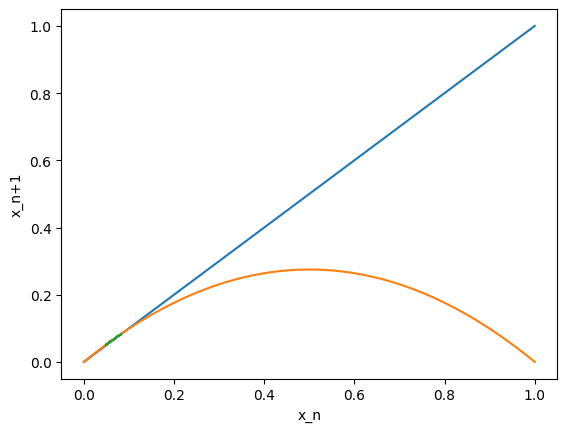

Peroid-4
0.86


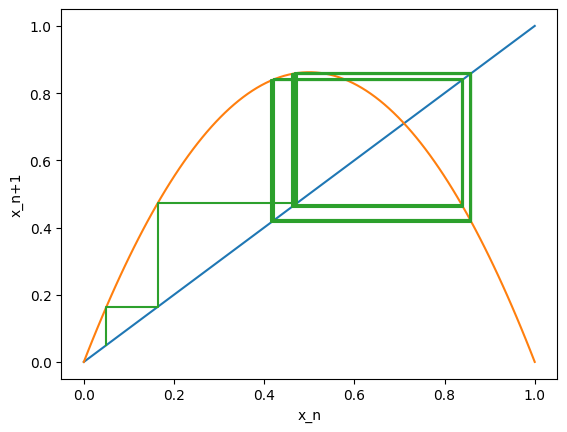

Critical
0.89


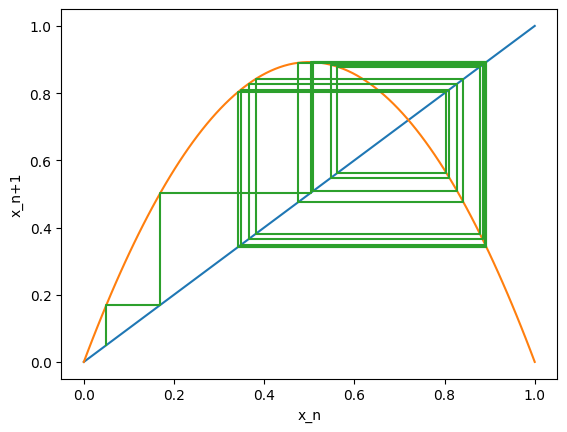

In [ ]:
print('Period-1')
logmapplot(1.1)

print('Peroid-4')
logmapplot(3.449)

print('Critical')
logmapplot(3.57)


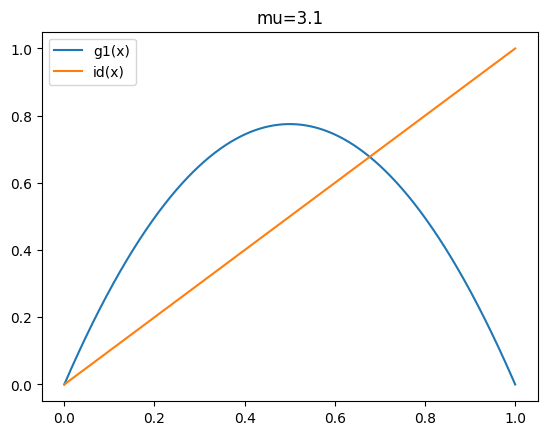

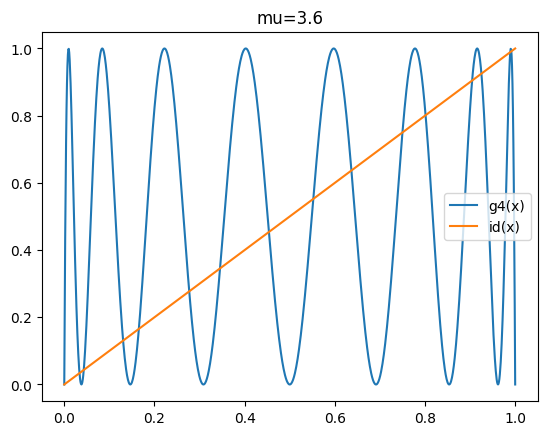

In [ ]:
def g1(x, mu):
    return -mu*x**2 + mu*x

def g4(x, mu):
    return log_map(log_map(log_map(log_map(x, 4), 4), 4), 4)

def identity(x):
    return x

mu1 = 3.1
mu4 = 3.6

x = np.linspace(0, 1, 1000)

plt.plot(x, g1(x, mu1), label='g1(x)')
plt.plot(x, identity(x), label='id(x)')
plt.title(f'mu={mu1}')
plt.legend()
plt.show()

plt.plot(x, g4(x, mu4), label='g4(x)')
plt.plot(x, identity(x), label='id(x)')
plt.title(f'mu={mu4}')
plt.legend()
plt.show()


g1 has no stable points, g4 has stable points at about (0.9, 0.9) and at (.3, .3)

In [ ]:
def lyapunov_exponent(x0, mu, num_iterations, num_trials):
    delta = 1e-4
    sum_log_delta = 0

    for trial in range(num_trials):
        x = x0 + (2 * np.random.random() - 1) * delta

        for i in range(num_iterations):
            f = log_map(x, mu)
            df = mu * (1 - 2 * x)
            x_new = f + delta * df
            sum_log_delta += np.log(abs(df))
            x = x_new

    return sum_log_delta / (num_iterations * num_trials)



mu_values = [3.3, 3.8]
num_iterations = 1000
num_trials = 100


for mu in mu_values:
    lyap_exp = lyapunov_exponent(0.5, mu, num_iterations, num_trials)

    print(f"Lyapunov exponent for mu={mu}: {lyap_exp:.5f}")
    x = 0.5
    delta = 1e-8
    xs = [x + delta]


    for i in range(num_iterations):
        xs.append(log_map(xs[-1], mu))
    diffs = [abs(xs[i] - x) for i in range(1, len(xs))]

Lyapunov exponent for mu=3.3: -0.62064
Lyapunov exponent for mu=3.8: 0.42073
